**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/R/clases/3_estadistica/3_elementos_de_inferencia.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/Rlang) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


### Lo siguiente está basado en los libros:

### * B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009

### * G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

### El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)


**Nota:**

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

In [1]:
install.packages("latex2exp",lib="/usr/local/lib/R/site-library/",
                repos="https://cran.itam.mx/")

In [1]:
library(ggplot2)
library(latex2exp)

In [2]:
options(repr.plot.width=8, repr.plot.height=8) #esta línea sólo se ejecuta para jupyterlab con R

# Introducción

El objetivo de la Estadística es la de descripción de fenómenos que a través de datos manifiestan variabilidad. En particular, la inferencia estadística **describe alguna característica de una población** en base a la **información que se tiene de una o varias muestras de la misma**.  Por ejemplo, para llevar a cabo una encuesta de opinión política, no es necesario consultar a toda la población de votantes para concluir que cierto porcentaje de ésta favorece a un(a) candidato(a). 

En esta nota revisamos el método de Fisher con su variante propuesta por Jerzy Neyman (1894 - 1981) y Egon Pearson (1895 - 1980, hijo de Karl Pearson) para la metodología de prueba (o contraste) de hipótesis y determinar si las suposiciones sobre la población son soportadas (estadísticamente significativas) a partir de una muestra de tal población. Tal método forma parte de la inferencia estadística. Otro método de inferencia es la construcción de **intervalos de confianza** y está relacionado directamente con el de las pruebas de hipótesis.

**Un poco de historia ...**

Ronald Aylmer Fisher (1890 - 1962), matemático inglés, cuyo interés por la agricultura y la genética lo llevó a dirigir el centro de investigación agrícola más importante de su época en el Reino Unido, el *Rothamsted Agricultural Experiment Station*, contribuyó gran parte de las ideas fundamentales que utiliza la estadística moderna y originó lo que se conoce como **diseño de experimentos**. La **aleatoriedad del muestreo** fue introducida por él, formalizó lo que hoy conocemos como **pruebas de hipótesis** y acuñó el término de **hipótesis nula**, entre otras aportaciones.

# Hipótesis y evidencia

De acuerdo al filósofo austriaco Karl Popper (1902 - 1994) el conocimiento se construye, a partir de la imposibilidad de la negación de las hipótesis que se introducen para explicar la realidad. **Una hipótesis no puede desecharse, a menos que haya evidencia suficiente para ponerla en duda**.

Usualmente las hipótesis surgen para tratar de explicar algún fenómeno, por ejemplo:

1) **Fenómeno:** amanecer. Hipótesis: **el sol sale todos los días**.

2) **Fenómeno:** un paciente llega a ver a una médica y le explica sus síntomas. Hipótesis: **paciente enfermo de la enfermedad "X"**.

3) **Fenómeno:** estudiante realiza examen de admisión a un departamento "Y" de una universidad. Hipótesis: **admisión al departamento "Y" es sin sesgo**.

Las hipótesis **son rechazadas o no dependiendo de los datos observados basados en una o varias muestras (evidencia)**. Las hipótesis iniciales son nombradas **hipótesis nulas** (no hay cambio, no hay diferencia, no hay característica especial...). Para cada ejemplo anterior supóngase que cada hipótesis es la inicial  o nula y además se tienen las siguientes evidencias:

1) Una persona observa la salida del sol en la mañana por su ventana. 

2) La médica reconoce síntomas relacionados a la enfermedad "X".

3) La estudiante revisa los resultados del examen de admisión.

Para cada evidencia se calculan probabilidades de la evidencia dada la hipótesis por algún modelo de probabilidad (por ejemplo modelo equiprobable, subjetivo o frecuentista, ver [1_elementos_de_probabilidad](https://github.com/ITAM-DS/Propedeutico/blob/master/R/clases/2_probabilidad/1_elementos_de_probabilidad.ipynb) y con alguna metodología (en esta nota revisamos el método por Neyman y Pearson):

1) Probabilidad que el sol salga el día de mañana dado que el sol sale todos los días: 1.

2) Probabilidad que el paciente tenga tales síntomas dado que el paciente tiene la enfermedad "X": 0.8.

3) Probabilidad de ser admitida en el departamento "Y" dado que la admisión a tal departamento es sin sesgo: 0.4.

Entonces cada hipótesis nula se rechaza (la evidencia **sugiere** fuertemente que es falsa) o no se rechaza (la evidencia **no sugiere** fuertemente que es falsa) en favor o no, respectivamente, de la **hipótesis alterna** (complementaria de la hipótesis nula). Para cada ejemplo anterior se tienen como ejemplo las siguientes hipótesis alternas:

* El sol no sale todos los días.

* El paciente no tiene la enfermedad "X".

* Admisión al departamento "Y" tiene sesgo.

Las **pruebas o contraste de hipótesis** son una metodología estadística que verifican la validez de las hipótesis o infieren características de una población (por ejemplo **parámetros** si las hipótesis están enunciadas en términos de parámetros poblacionales) al ser puestas a prueba con la evidencia observada u obtenida vía muestras de la población (datos).

**Comentarios:** 

* El no rechazo/rechazo de la hipótesis nula **no garantiza** que las hipótesis nulas/alternas sean verdaderas pues que la evidencia (datos) no contradigan las hipótesis no implica su veracidad (principalmente porque la evidencia también tiene incertidumbre). Por ejemplo, no rechazar la hipótesis que el paciente tiene la enfermedad "X" dada la evidencia **no implica** que el paciente efectivamente esté enfermo de la enfermedad "X" (podría tener otra enfermedad relacionada); asimismo, rechazar que el proceso de admisión al departamento "Y" a estudiantes no tiene sesgo **no sugiere** que exista sesgo al proceso de admisión para estudiantes (podría darse la situación que estudiantes no cumplan con el perfil requerido).

* La notación para la hipótesis inicial o nula es $H_0$ y la alternativa es $H_a$.

* Es importante definir $H_0$ de modo que su rechazo nos proporcione información útil y relevante. Por ejemplo, si se especifica la hipótesis nula: "el $90\%$ de los crímenes cometidos en la ciudad de México quedan impunes", la hipótesis alterna es: "el porcentaje que queda impune es distinto del $90\%$" y el rechazo de la hipótesis nula en favor de la alterna no es muy útil. En este ejemplo podría escribirse a $H_0$ como: "Al menos un $90\%$ de los crímenes cometidos en la ciudad de México quedan impunes".

## Nivel de significancia de la prueba

El rechazo o no rechazo de la hipótesis nula conduce a errores si tal hipótesis es verdadera o falsa respectivamente. Neyman y Pearson nombraron a tales errores como errores de tipo 1 y 2:

|$H_0$|Rechazar $H_0$|No rechazar $H_0$|
|:------:|:----:|:----:|
|Verdadera|Error tipo I|-|
|Falsa|-|Error tipo II|

y en el proceso estadístico de pruebas de hipótesis se **considera más grave el error tipo I que el II** por ello se controla la probabilidad del error tipo I, el cual se define como el **nivel de significancia de la prueba**:

$$\text{nivel de significancia de la prueba es: } P(\text{ETI}) = \alpha$$

donde: ET1 es el error tipo 1. Típicamente $\alpha$ es $0.05$ o $0.01$. Tales valores están relacionados con el hecho que en la mayoría de los casos la distribución de los datos es aproximada por una normal y para tal distribución, el $95\%$ de los datos se encuentran a una distancia de $2\sigma$ (aprox.) de la media y el $99\%$ a una distancia de $3\sigma$ (aprox.) y estos valores son particularmente fáciles de calcular sin ninguna ayuda computacional\*.

\* El cuantil .01 en una distribución normal estándar es $-2.32$ y el cuantil $.05$ es $-1.64$.

Así, se define al **nivel de significancia de la prueba** como la **probabilidad máxima con la cual podemos rechazar la hipótesis nula**.


**Comentarios:** 

* El ET1 puede considerarse como encarcelar a una persona inocente y el ET2 como no sentenciar a una persona culpable (el ET1 el "error más grave"). La probabilidad de cometer ET2 se denota como $\beta$ y la probabilidad de cometer ET1 como $\alpha$.

* Podemos también escribir que ET1 es un **falso positivo:** observar una diferencia ("rechazar o positivo") cuando en realidad no hay diferencia estadísticamente significativa. 


* Podemos también escribir que ET2 es un **falso negativo:** no observar una diferencia ("no rechazar o negativo") cuando en realidad sí hay diferencia estadísticamente sinificativa .

* $H_0$ típicamente no es rechazada a menos que la evidencia sugiera fuertemente que es falsa (es significativa).

* Una vez fijada la probabilidad de cometer ET1 el proceso de Neyman y Pearson **minimiza** la probabilidad de cometer ET2, esto es, minimizar la probabilidad de no rechazar cuando $H_0$ es falsa. Tal probabilidad equivale a **maximizar** la probabilidad de rechazar $H_0$ cuando $H_0$ es falsa pues: 

$$\beta = P(\text{ETII}) = P(\{\text{no rechazar } H_0\}|\{H_0 \text{ es falsa}\})=1-P(\{\text{rechazar} H_0\}|\{H_0 \text{ es falsa}\}).$$ 

Entonces: $\min \beta$ equivale a $\max P(\{\text{rechazar} H_0\}|\{H_0 \text{ es falsa}\})$.


* A la probabilidad de rechazar $H_0$ dado que $H_0$ es falsa se le conoce como **potencia de la prueba** y está dada por $1-\beta$. Maximizar la potencia es entonces maximizar la probabilidad de rechazo de una hipótesis falsa.

* Evidentemente nos gustaría que la probabilidad de ambos tipos de error fuese lo más baja posible, sin embargo, para **una muestra dada** existe un trueque inevitable entre las dos probabilidades $\alpha$ y $\beta$. Si una disminuye la otra aumenta y viceversa. Una vez más, depende de la experimentadora tomar la decisión adecuada. Si dado un tamaño de muestra y un valor de significancia $\alpha$, puede elegirse entre pruebas con distinta potencia, entonces lo óptimo es escoger la que tiene la potencia máxima.

    Lo siguiente es parte del artículo original de Neyman y Pearson: "¿Qué es más serio, condenar a un inocente o exonerar a un culpable? Esto dependerá de las consecuencias del error: ¿se castigará con la muerte o simplemente con una multa? ¿Cuál es el peligro a la comunidad de tener un criminal suelto? Desde el punto de vista de la teoría matemática, lo único que podemos lograr es demostrar como el riesgo de errores puede ser controlado y minimizado."

## Valor p o cálculo de la probabilidad condicional dado que $H_0$ es verdadera

En varios ejemplos para diferentes valores del nivel de significancia de la prueba, $\alpha$, suele darse la situación que se rechaza $H_0$ para un valor de $\alpha$ y para otro valor no se rechaza $H_0$ por lo que nuestra decisión final depende de $\alpha$. ¿Cuál es el valor entonces que se debe elegir $.05$ o $.01$? ¿cuál es el nivel de significancia para el cual se rechazaría a cualquier nivel de significancia más alto y cuál es el nivel para el que cualquier valor de nivel de significancia más bajo no se rechazaría?.

El **valor p** o **nivel de significancia observado** de una prueba de hipótesis, es la probabilidad de **obtener los datos o evidencia, a partir de una muestra**, dado que la hipótesis nula es verdadera.

### Ejemplo

Imaginemos que un estudiante realiza un examen de matemáticas de opción múltiple. El examen consta de $10$ preguntas, cada una con $5$ opciones de respuesta, de las cuales sólo una es la correcta. Este estudiante obtiene $5$ preguntas correctas. 

Notemos que si las respuestas se eligen en forma aleatoria, la probabilidad de éxito es de $\frac{1}{5}$ para cada pregunta. Podemos pensar al proceso de contestar el examen aleatoriamente como un experimento binomial con $10$ ensayos y probabilidad de éxito de $\frac{1}{5}$ en cada ensayo y $X$ variable aleatoria binomial $n=10, p=\frac{1}{5}$. Por tanto el número de aciertos esperados al contestar de forma aleatoria es de:

$$\mu = (10) \frac{1}{5} = 2.$$

¿Qué tan plausible es que el estudiante haya obtenido al menos $5$ aciertos? ¿Será meramente producto del azar o quizás posee algún conocimiento de matemáticas? Para contestar estas preguntas planteamos las siguientes hipótesis complementarias:

$H_0$ : el estudiante contestó al azar

$H_a$ : el estudiante no contestó al azar.

La probabilidad de tener al menos 5 aciertos puede calcularse como, $$P(X \geq 5) = 1 - P(X < 5)=1-\displaystyle \sum_{i=0}^4P(X=i)$$

Si $H_0$ es cierta y $p=\frac{1}{5}$ entonces:

In [3]:
pbinom(5,10,1/5,lower.tail = F) + dbinom(5,10,1/5)

[1] 0.0327935

**Obs:** el valor anterior es el **valor p**.

En conclusión, la probabilidad de que el estudiante haya obtenido al menos $5$ aciertos contestando de manera aletoria es de $3.3\%$. Existen dos posibilidades:

* $H_0$ es verdadera y estamos ante un acontecimiento inusual que sólo ocurre el $3.3\%$ del tiempo o bien,

* $H_0$ es falsa.

Si $\alpha=.01$ no rechazamos y si $\alpha=.05$ sí rechazamos de acuerdo al valor p. En el segundo caso, tenemos que $H_0$ se rechazaría en favor de $H_a$. 

Ahora, si consideramos que los $5$ aciertos no fueron obra de la casualidad, entonces, ¿podemos concluir que el estudiante sabe algo de matemáticas? Desafortunadamente no, ya que no puede descartarse que haya copiado algunas de las respuestas. Intuitivamente, los $5$ aciertos obtenidos podrían ser suficientemente significativos para descartar que son producto del azar.

**Comentarios:**

* **El valor p nos proporciona el límite entre rechazar y no rechazar de acuerdo a la regla: si el valor p es menor que el nivel de significancia de la prueba $\alpha$ entonces rechazamos $H_0$**. En este sentido, **el valor p es el valor mínimo para el cual el valor de la muestra observada conduce a rechazar $H_0$** ($\alpha$'s más grandes que el valor p conducen a rechazar $H_0$).

* Un valor p pequeño, no favorece a la hipótesis nula (rechazamos), un valor p grande indica que los datos obtenidos son compatibles con la hipótesis nula (no rechazamos). En el ejemplo anterior valores p más pequeños conducen a concluir que no fue producto del azar las respuestas del estudiante.

## Región de rechazo y estadísticas de prueba

La **región de rechazo o región crítica** $\mathscr{C}$ es el subconjunto de valores del espacio muestral (aquel que contiene diferentes muestras de la población) para los cuales se rechaza $H_0$. Tal región de rechazo está determinada por el nivel de significancia $\alpha$. El procedimiento estadístico de pruebas de hipótesis por Neyman y Pearson entonces fija la probabilidad del error tipo 1 como: $$\alpha = P(ET1) = P(\{x_1,\dots,x_n\} \in \mathscr{C} | \{H_0 \text{ es verdadera}\}).$$

y se rechaza $H_0$ si $\alpha$ es pequeño (o en la práctica el valor p si es pequeño). En las pruebas de hipótesis **paramétricas** (población completamente definida en términos de parámetros, por ejemplo $\mu$ o $\sigma$) la probabilidad (condicional) anterior típicamente se reformula en términos de una estadística resúmen, por ejemplo $\bar{X}$: $$\alpha = P(ET1) = P(\bar{X} \in \mathscr{C} | \{H_0 \text{ es verdadera}\}).$$

y a esta estadística se le nombra **estadística de prueba**.

### Ejemplo

Fisher originalmente construyó las pruebas de hipótesis para probar la eficacia de fertilizantes y pesticidas en experimentos agrícolas para evaluar la productividad del campo en cuestión. Supongamos que quiere determinarse si la adopción del uso de cierto fertilizante para el maíz es deseable. Los pasos a seguir son los siguientes:

* Diseñar un experimento con una muestra de parcelas en las que se aplica el fertilizante.

* Elegir una cantidad que represente a los datos que nos interesa medir, usualmente se trata de una media, de una desviación estándar o de una proporción. En este caso queremos representar el rendimiento o productividad de las parcelas. La cantidad a medir supóngase que es la cantidad promedio de maíz producida, $\mu$, el rendimiento promedio. Sea $R_0$ el valor actual del rendimiento promedio del maíz. 

* Determinar la hipótesis nula y la alterna, que en este caso son: $H_0:$ el fertilizante no sirve, $H_a:$ el fertilizante sirve. En términos del rendimiento promedio éstas se reescriben como:

$$H_0: \mu = R_0$$

$$H_a: \mu > R_0$$

* Establecer un nivel de significancia, por ejemplo $\alpha = 0.05.$

* Obtener los datos acerca de los rendimientos de cada parcela de la muestra y calcular el rendimiento promedio $\bar{x}$. Tomando $\bar{X}$ como estadística de prueba si $\bar{x} \leq R_0$ entonces $H_0$ no será rechazada (el fertilizante no sirve). O bien:

* Calcular: $P(\bar{X} > \bar{x}|\{H_0 \text{ es verdadera })$ el cual es el valor p. Si el valor p es menor a $0.05$, entonces concluimos que estamos ante algo muy inusual, que sólo ocurre con probabilidad menor al $5\%$ o bien, la hipótesis nula es falsa. Se dice que los resultados son significativos a un nivel de $0.05$. Dado que $0.05$ es el nivel de significancia preestablecido, se procede a rechazar la hipótesis nula -en favor de la alterna-, es decir, el fertilizante sirve.


## Ejemplo en R...

Supóngase que la proporción de estudiantes que son admitidos a la Universidad Berkley de California está denotado por *prop* y la oficina de relaciones públicas emite un comunicado en el que se menciona que la UCB ha tenido un $40\%$ de aceptación. Considérese los datos *UCBAdmissions* de *R* que contienen la admisión del año $1973$ por género, departamento y la variable *admitido* y *no admitido*:

In [4]:
print(dimnames(UCBAdmissions))

$Admit
[1] "Admitted" "Rejected"

$Gender
[1] "Male"   "Female"

$Dept
[1] "A" "B" "C" "D" "E" "F"



Supóngase que tales datos constituyen una muestra aleatoria simple. 

**Responder:** ¿tales datos son consistentes con la carta emitida por relaciones públicas o proveen evidencia que la tasa de aceptación es significativamente menor al $40\%$? (usar un nivel de significancia de $\alpha=0.01$).

**Solución:**

La prueba de hipótesis para este ejemplo es:

$$H_0: \hat{p}=0.4$$

$$H_a: \hat{p}<0.4$$

Con $H_0$ hipótesis nula y $H_a $ la hipótesis alternativa y $\hat{p}$ proporción. Rechazamos la hipótesis nula si el valor p es menor a $\alpha = 0.01$. 

El valor p se calcula como: 

$$P(\hat{p} < \hat{p}_{obs}|H_0 \text{ es verdadera })$$

donde: $\hat{p}$ es la estadística de prueba (proporción estimada) y $\hat{p}_{obs}$ es la proporción calculada/observada en los datos.

Suponiendo normalidad (garantizada por el teorema del límite central) y que $H_0$ es verdadera resulta: $\frac{\hat{p} - 0.4}{\sqrt{\frac{.4(1-.4)}{n}}} \sim N(0,1)$ y $\hat{p}_{obs}$ se calcula con los datos:

In [5]:
#in next line we use number 1 to combine by gender and department
#if instead 1 we use c(1,2) result is combined by department only
#this last one is equivalent to apply(UCBAdmissions, 1, sum)
admitted_rejected <- margin.table(UCBAdmissions, 1) 

In [6]:
print(admitted_rejected)
print('proporcion de admitidos en los datos de UCBAdmissions:')
p_hat_obs<-as.numeric(admitted_rejected[1]/(admitted_rejected[1]+admitted_rejected[2]))
print(p_hat_obs)

Admit
Admitted Rejected 
    1755     2771 
[1] "proporcion de admitidos en los datos de UCBAdmissions:"
[1] 0.3877596


por lo que $\hat{p}_{obs}=\frac{1755}{1755+2771} = 0.3878$ y se tiene:

In [7]:
#number of students
n<-as.numeric(admitted_rejected[1]+admitted_rejected[2]) 

#proportion assuming H0 is True
p_H_0<-0.4

#observed value of test statistic 
obs_test_statistic <-(p_hat_obs-p_H_0)/sqrt((p_H_0)*(1-p_H_0)/n)

print(obs_test_statistic)

[1] -1.680919


que es aproximadamente $-1.681$ y el valor p entonces es: $$P(\hat{p} < \hat{p}_{obs}) = P\left(\frac{\hat{p} - 0.4}{\sqrt{\frac{.4(1-.4)}{n}}} < -1.681\right) = P(Z < -1.68) \approx 0.0464 ,$$ donde $Z \sim N(0,1)$.

In [8]:
p_value <- pnorm(obs_test_statistic)
print(p_value)

[1] 0.04638929


Y para el nivel de significancia especificado $\alpha=0.01$ **no se rechaza** $H_0$ en favor de la hipótesis: "la proporción verdadera de estudiantes admitidos a la Universidad es menor al $40\%$" y los **datos observados son consistentes con el comunicado**.

**Obs:** si $\alpha=0.05$ entonces sí hubiéramos rechazado $H_0$ y hubiéramos concluido que los datos UCBAdmissions dan evidencia significativa que la proporción verdadera de estudiantes que son admitidos a la Universidad es menor al $40\%$ por lo que **los datos no son consistentes con el comunicado**. Depende de cada situación el nivel de significancia fijado, ¿se trata de una situación de vida o muerte o de algo con consecuencias menos drásticas?

## Valor crítico

En el ejemplo anterior obsérvese que para un nivel de significancia $\alpha = 0.01$ se le corresponde el cuantil $-z_{0.99} = z_{0.01}$ cuyo valor es:

In [9]:
-qnorm(.99)

[1] -2.326348

In [10]:
qnorm(.01)

[1] -2.326348

y para el nivel de significancia $\alpha = 0.05$ se tiene como valor al cuantil $-z_{0.95} = z_{.05}$:

In [11]:
-qnorm(.95)

[1] -1.644854

In [12]:
qnorm(.05)

[1] -1.644854

**¿Conclusión?** 

Rechazamos o no $H_0$ de acuerdo al valor p con la regla: 

**rechazar $H_0$ si el valor p es menor que el nivel de significancia $\alpha$**

o bien si conocemos los valores de los cuantiles y el valor observado de la **estadística de prueba** también podemos concluir si debemos o no rechazar $H_0$. En el ejemplo el valor observado de la estadística de prueba en la variable `obs_test_statistic` es aproximadamente $-1.681$ entonces:

* Rechazamos $H_0$ para un nivel de significancia $\alpha = 0.05$ pues el valor observado de la estadítica de prueba es $\approx -1.681$ y cumple que es menor a $-1.644 \approx z_{.05}$.

* No rechazamos $H_0$ para un nivel de significancia $\alpha = 0.01$ pues el valor observado de la estadítica de prueba es $\approx -1.681$ y cumple que es mayor que $-2.32 \approx z_{.01}$


Los valores $z_{.05}$ o $z_{.01}$ (cuantiles) se conocen como **valores críticos**.

## Visualización

En la siguiente gráfica visualizamos la región de rechazo para el nivel de significancia $\alpha = 0.05$ asociado al valor crítico $z_{.05}$ y el valor observado de la estadística de prueba del ejemplo anterior.

In [13]:
alpha = 0.05
quantile = qnorm(alpha)

In [14]:
set.seed(2000)
n <- 5000
df <- data.frame(x=rnorm(n))
y <- dnorm(df$x)
df$y <- y

In [15]:
gf <- ggplot(data = df, aes(x=x, y=y)) + geom_point(size=.2) + 
      theme(plot.title = element_text(size=20, hjust = 0.5))

In [16]:
gf2 <- gf + 
       geom_area(mapping = aes(x = ifelse(x < quantile, x, quantile),
                               y = ifelse(x < quantile, y, 0)), 
                 fill = "salmon") + 
        geom_segment(aes(x = obs_test_statistic, 
                         y = 0, 
                         xend = obs_test_statistic, 
                         yend = dnorm(obs_test_statistic)
                         ),
                      colour = "royalblue1"
                     ) 

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


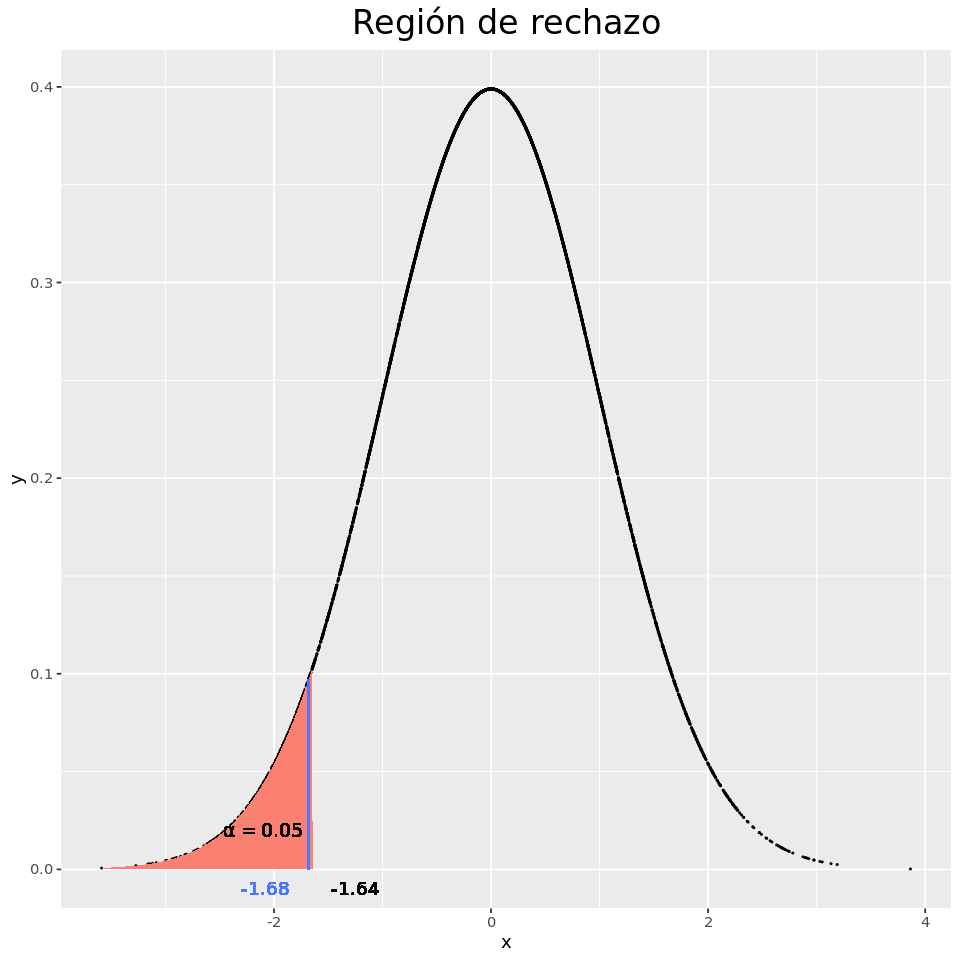

In [17]:
gf2 +
geom_text(x = obs_test_statistic - .4, y = -1e-2, label = "-1.68", colour="royalblue1") + 
geom_text(x = quantile +  .4, y = -1e-2, label = "-1.64") + 
geom_text(x=-2.1,y=2e-2,label=TeX("$\\alpha = 0.05$"), size=4 )+
ggtitle("Región de rechazo")

Warning message:
“Removed 4713 rows containing missing values (geom_point).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


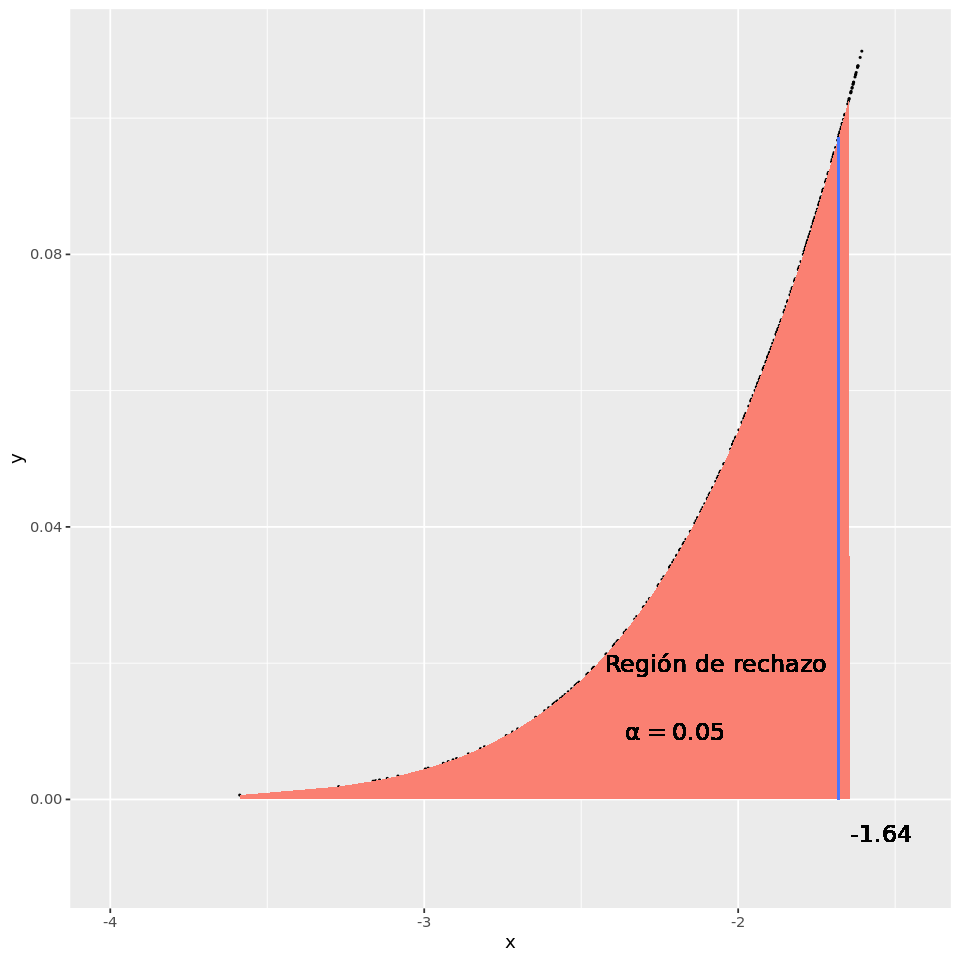

In [18]:
gf2 + 
geom_text(x = quantile +  .1, y = -5e-3, label = "-1.64", size = 5) + 
geom_text(x=-2.2,y=1e-2,label=TeX("$\\alpha = 0.05$"), size=5 ) +
geom_text(x=-2.07,y=2e-2,label="Región de rechazo", size=5) +
ylim(-1e-2,0.11) + 
xlim(-4, -1.45)

Warning message:
“Removed 6 rows containing missing values (position_stack).”
Warning message:
“Removed 4738 rows containing missing values (geom_point).”


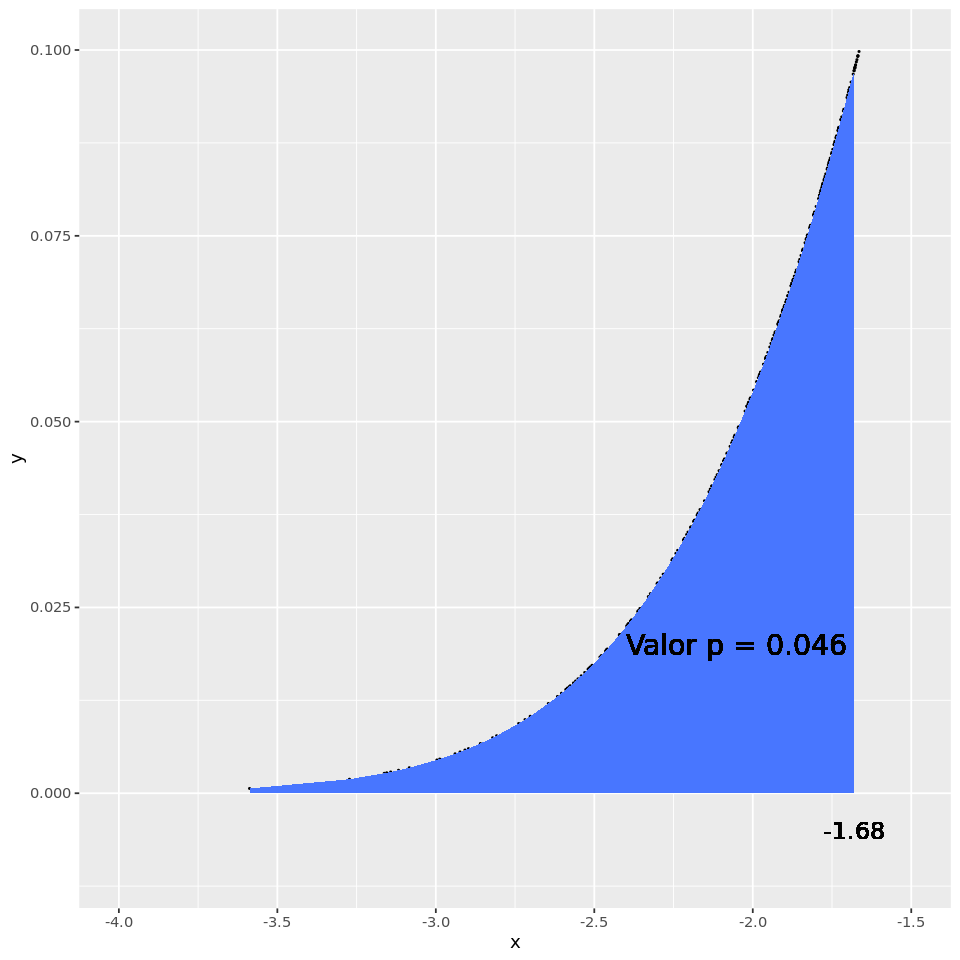

In [19]:
gf +
geom_area(mapping = aes(x = ifelse(x < obs_test_statistic, x, obs_test_statistic),
                        y = ifelse(x < quantile, y, 0)), 
          fill = "royalblue1") +
geom_text(x = obs_test_statistic, y = -5e-3, label = "-1.68", size = 5) + 
geom_text(x=-2.05,y=2e-2,label="Valor p = 0.046", size=6 ) +
ylim(-1e-2,0.10) + 
xlim(-4, -1.5) 

En este ejemplo se ha mostrado la **prueba de hipótesis de una cola o de un lado**. También existen pruebas de hipótesis de **dos colas o de dos lados** que para este ejemplo se definiría como:

$$H_0: \hat{p} = 0.4 $$

$$H_a: \hat{p} \neq 0.4 $$

Y su región de rechazo determinada con un nivel de significancia $\alpha = 0.05$ es:

In [20]:
alpha_divided_by_2 = 0.05 / 2
quantile_left = qnorm(alpha_divided_by_2)
quantile_right = -qnorm(alpha_divided_by_2)

In [21]:
print(quantile_left)

[1] -1.959964


In [22]:
print(quantile_right)

[1] 1.959964


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


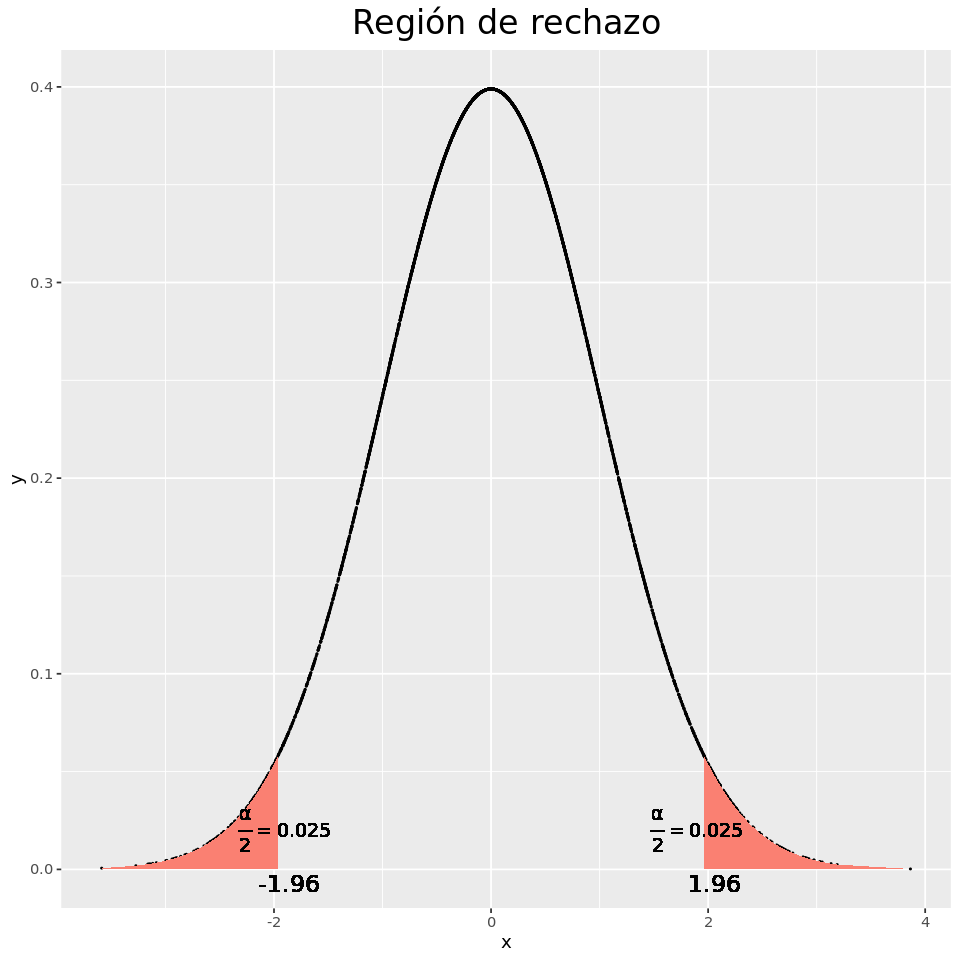

In [24]:
gf + 
geom_area(mapping = aes(x = ifelse(x < quantile_left, 
                                   x, quantile_left
                                   ),
                        y = ifelse(x < quantile_left, y, 0)), 
          fill = "salmon") + 
geom_area(mapping = aes(x = ifelse(x > quantile_right, 
                                   x, quantile_right
                                   ),
                        y = ifelse(x > quantile_right, y, 0)), 
          fill = "salmon") + 
geom_text(x = quantile_left +  .1, y = -7e-3, label = "-1.96", size = 5) + 
geom_text(x = quantile_right +  .1, y = -7e-3, label = "1.96", size = 5) + 
geom_text(x=-1.9,y=2e-2,label=TeX("$\\frac{\\alpha}{2} = 0.025$"), size=4 ) +
geom_text(x=1.9,y=2e-2,label=TeX("$\\frac{\\alpha}{2} = 0.025$"), size=4 ) +
ggtitle("Región de rechazo")

Y el valor p para esta situación es:

In [25]:
2*p_value

[1] 0.09277859

Con lo que sólo rechazaríamos $H_0$ para un nivel de significancia $\alpha \approx 0.093$ o mayor.

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


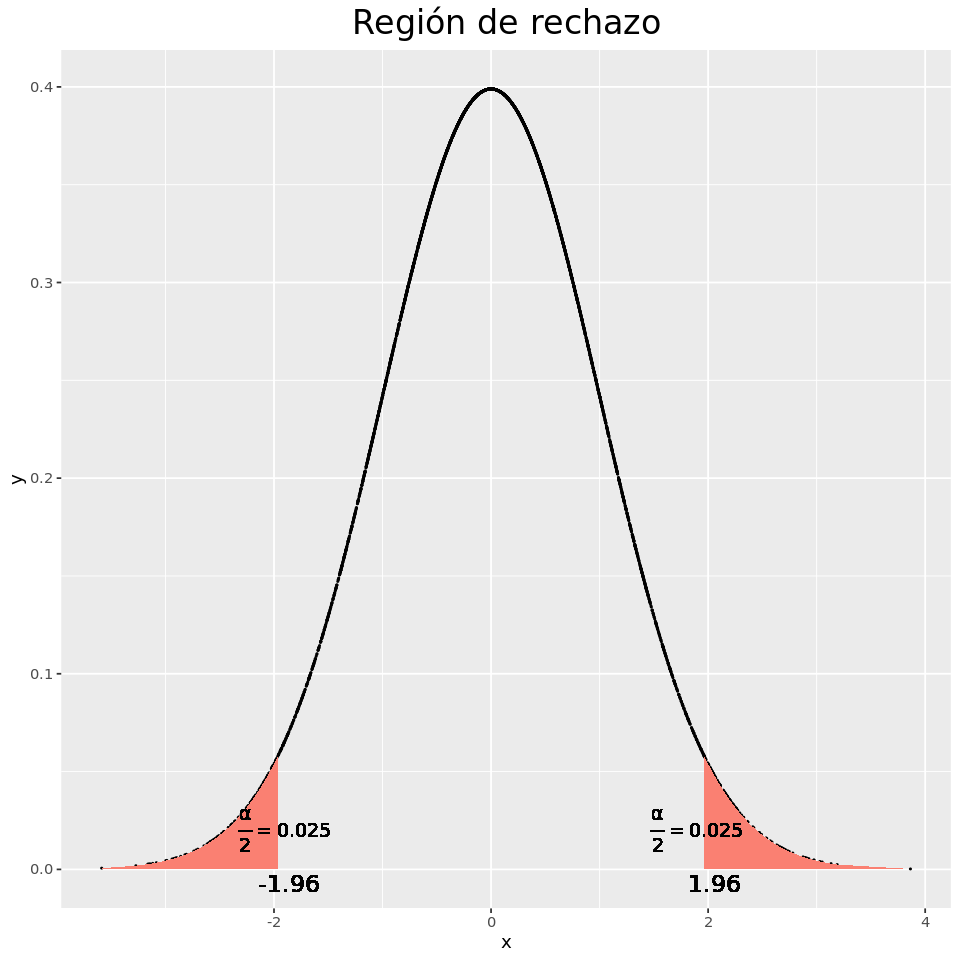

In [37]:
gf + 
geom_area(mapping = aes(x = ifelse(x < quantile_left, 
                                   x, ifelse(x < quantile_right, 
                                             ifelse(x<0,quantile_left,quantile_right), 
                                             x)
                                   ),
                        y = ifelse(x < quantile_left, 
                                   y, ifelse(x < quantile_right, 0, y))
                                   ), 
          fill = "salmon") + 
geom_text(x = quantile_left +  .1, y = -7e-3, label = "-1.96", size = 5) + 
geom_text(x = quantile_right +  .1, y = -7e-3, label = "1.96", size = 5) + 
geom_text(x=-1.9,y=2e-2,label=TeX("$\\frac{\\alpha}{2} = 0.025$"), size=4 ) +
geom_text(x=1.9,y=2e-2,label=TeX("$\\frac{\\alpha}{2} = 0.025$"), size=4 ) +
ggtitle("Región de rechazo")